In [1]:
import torch
import torch.nn as nn
import os
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from train_test import train_kd_pruning,train_pruning,test,train
from helpers import get_data_loader
from model import ViT
from helpers import load_checkpoint
import time

In [2]:
torch.manual_seed(42)
train_loader, test_loader = get_data_loader(
    1024, 2, "datasets/cifar-100/cifar-100-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
teacher_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=48,
    depth=7,
    heads=12,
    mlp_dim=384,
    # dropout=0.1,
).to("cuda")

teacher_save_path = "save_model/cifar-100/vit_16_teacher_cifar-100"

teacher_load_path = f"{teacher_save_path}/best_model.pt"

student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=48,
    depth=6,
    heads=6,
    mlp_dim=384,
    # dropout=0.1,
).to("cuda")

student_kd_save_path = "save_model/cifar-100/vit_16_student_base_cifar-100"

student_base = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=48,
    depth=6,
    heads=6,
    mlp_dim=384,
    # dropout=0.1,
).to("cuda")


Epoch 1/100, Loss: 4.3739959561094945
Current Learning Rate: 0.0009997532801828658
Test Accuracy: 6.79%
max_test_accuracy : 6.79
Epoch 2/100, Loss: 4.017556205087779
Current Learning Rate: 0.0009990133642141358
Test Accuracy: 10.87%
max_test_accuracy : 10.87
Epoch 3/100, Loss: 3.7208113767662825
Current Learning Rate: 0.00099778098230154
Test Accuracy: 15.10%
max_test_accuracy : 15.1
Epoch 4/100, Loss: 3.4768372895766277
Current Learning Rate: 0.000996057350657239
Test Accuracy: 19.07%
max_test_accuracy : 19.07
Epoch 5/100, Loss: 3.267212673109405
Current Learning Rate: 0.0009938441702975688
Test Accuracy: 22.12%
max_test_accuracy : 22.12
Epoch 6/100, Loss: 3.0835434611962764
Current Learning Rate: 0.0009911436253643444
Test Accuracy: 24.67%
max_test_accuracy : 24.67
Epoch 7/100, Loss: 2.9355995995657787
Current Learning Rate: 0.0009879583809693736
Test Accuracy: 27.18%
max_test_accuracy : 27.18
Epoch 8/100, Loss: 2.8108180299097176
Current Learning Rate: 0.0009842915805643154
Test Acc

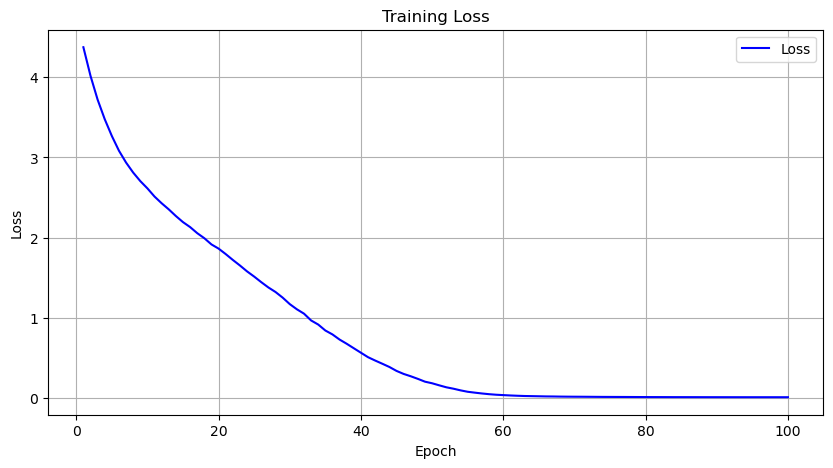

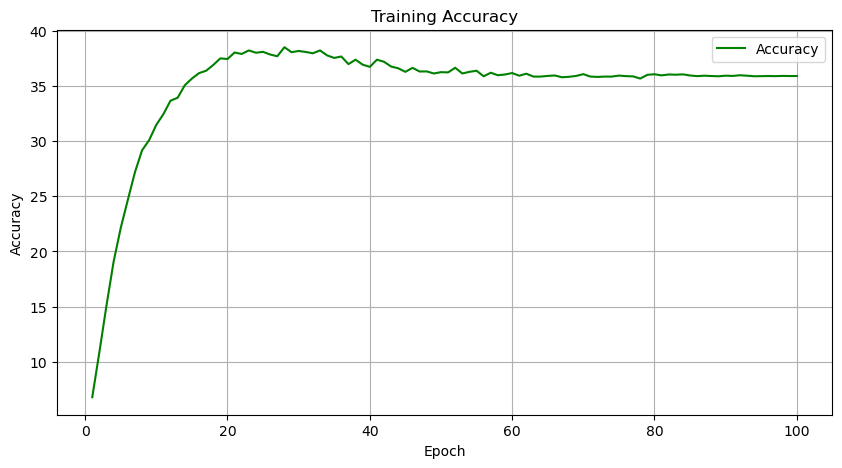

In [7]:

train(
    teacher_model,
    train_loader,
    test_loader,
    epochs=100,
    learning_rate=0.001,
    device="cuda",
    save_path=teacher_save_path
)

/home/yulian/Desktop/TFG2/train_test.py:226: UserWarning: torch.sparse.SparseTensor(shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:647.)
  param= nn.Parameter(torch.sparse.FloatTensor(param.shape).to('cuda'))


Epoch 1/100, Loss: 4.547087221729512
Current Learning Rate: 0.0009997532801828658
Test Accuracy: 7.45%
max_test_accuracy : 7.45
Epoch 2/100, Loss: 3.9980186248312193
Current Learning Rate: 0.0009990133642141358
Test Accuracy: 14.70%
max_test_accuracy : 14.7
Epoch 3/100, Loss: 3.5531546096412505
Current Learning Rate: 0.00099778098230154
Test Accuracy: 18.77%
max_test_accuracy : 18.77
Epoch 4/100, Loss: 3.237641091249427
Current Learning Rate: 0.000996057350657239
Test Accuracy: 22.64%
max_test_accuracy : 22.64
Epoch 5/100, Loss: 2.9835165617417316
Current Learning Rate: 0.0009938441702975688
Test Accuracy: 25.33%
max_test_accuracy : 25.33
Epoch 6/100, Loss: 2.7869844339331804
Current Learning Rate: 0.0009911436253643444
Test Accuracy: 28.16%
max_test_accuracy : 28.16
Epoch 7/100, Loss: 2.6182134394743004
Current Learning Rate: 0.0009879583809693736
Test Accuracy: 29.25%
max_test_accuracy : 29.25
Epoch 8/100, Loss: 2.498295954295567
Current Learning Rate: 0.0009842915805643154
Test Accu

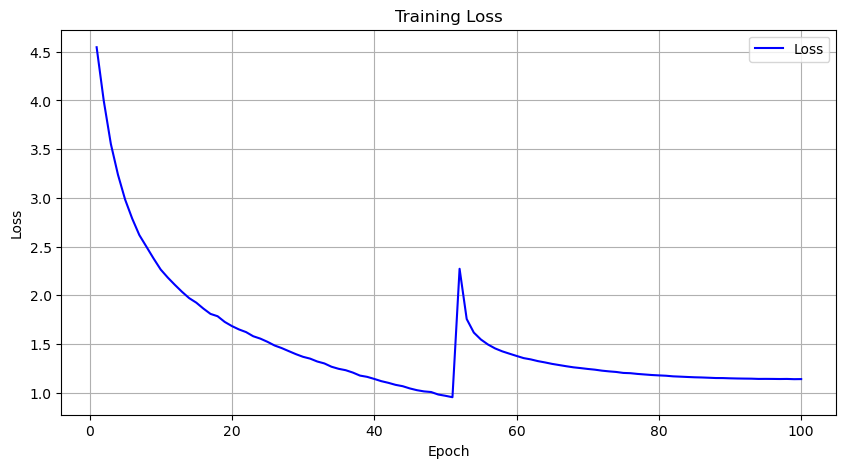

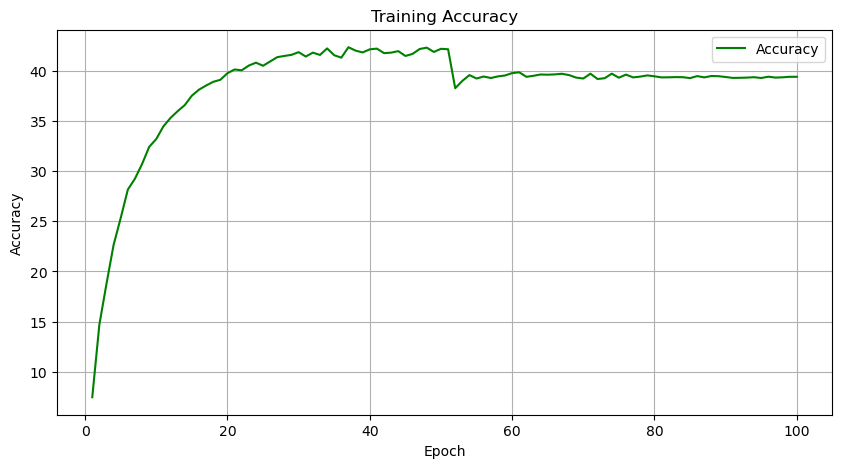

In [11]:
train_kd_pruning(
    student_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=2,
    soft_target_loss_weight=0.3,
    ce_loss_weight=0.7,
    epochs=100,
    learning_rate=0.001,
    device='cuda',
    pruning_method='structured',
    save_path=student_kd_save_path,
    load_path_teacher=teacher_load_path,
)

In [ ]:
load_checkpoint(
    student_kd, "save_model/cifar-100/vit_16_student_kd_cifar-100/best_model.pt"
)

In [12]:
start_time = time.time()
with torch.no_grad():
    test(student_base, test_loader, device="cuda")
inference_time = time.time() - start_time
print(f"student_base: {inference_time}")

start_time = time.time()
with torch.no_grad():
    test(student_kd, test_loader, device="cuda")
inference_time = time.time() - start_time
print(f"student_kd: {inference_time}")



Test Accuracy: 1.31%
student_base: 0.7576699256896973
Test Accuracy: 39.41%
student_kd: 0.5992522239685059


In [5]:
load_checkpoint(
    teacher_model, "save_model/cifar-100/vit_16_teacher_cifar-100/best_model.pt"
)

test(teacher_model, test_loader, device="cuda")

RuntimeError: Error(s) in loading state_dict for ViT:
	Missing key(s) in state_dict: "transformer.layers.6.0.norm.weight", "transformer.layers.6.0.norm.bias", "transformer.layers.6.0.fn.to_qkv.weight", "transformer.layers.6.0.fn.to_out.0.weight", "transformer.layers.6.0.fn.to_out.0.bias", "transformer.layers.6.1.norm.weight", "transformer.layers.6.1.norm.bias", "transformer.layers.6.1.fn.net.0.weight", "transformer.layers.6.1.fn.net.0.bias", "transformer.layers.6.1.fn.net.3.weight", "transformer.layers.6.1.fn.net.3.bias". 
	size mismatch for transformer.layers.0.0.fn.to_qkv.weight: copying a param with shape torch.Size([1152, 48]) from checkpoint, the shape in current model is torch.Size([2304, 48]).
	size mismatch for transformer.layers.0.0.fn.to_out.0.weight: copying a param with shape torch.Size([48, 384]) from checkpoint, the shape in current model is torch.Size([48, 768]).
	size mismatch for transformer.layers.1.0.fn.to_qkv.weight: copying a param with shape torch.Size([1152, 48]) from checkpoint, the shape in current model is torch.Size([2304, 48]).
	size mismatch for transformer.layers.1.0.fn.to_out.0.weight: copying a param with shape torch.Size([48, 384]) from checkpoint, the shape in current model is torch.Size([48, 768]).
	size mismatch for transformer.layers.2.0.fn.to_qkv.weight: copying a param with shape torch.Size([1152, 48]) from checkpoint, the shape in current model is torch.Size([2304, 48]).
	size mismatch for transformer.layers.2.0.fn.to_out.0.weight: copying a param with shape torch.Size([48, 384]) from checkpoint, the shape in current model is torch.Size([48, 768]).
	size mismatch for transformer.layers.3.0.fn.to_qkv.weight: copying a param with shape torch.Size([1152, 48]) from checkpoint, the shape in current model is torch.Size([2304, 48]).
	size mismatch for transformer.layers.3.0.fn.to_out.0.weight: copying a param with shape torch.Size([48, 384]) from checkpoint, the shape in current model is torch.Size([48, 768]).
	size mismatch for transformer.layers.4.0.fn.to_qkv.weight: copying a param with shape torch.Size([1152, 48]) from checkpoint, the shape in current model is torch.Size([2304, 48]).
	size mismatch for transformer.layers.4.0.fn.to_out.0.weight: copying a param with shape torch.Size([48, 384]) from checkpoint, the shape in current model is torch.Size([48, 768]).
	size mismatch for transformer.layers.5.0.fn.to_qkv.weight: copying a param with shape torch.Size([1152, 48]) from checkpoint, the shape in current model is torch.Size([2304, 48]).
	size mismatch for transformer.layers.5.0.fn.to_out.0.weight: copying a param with shape torch.Size([48, 384]) from checkpoint, the shape in current model is torch.Size([48, 768]).